In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [3]:
release_dates = pd.read_csv('data/release_dates.csv',
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [8]:
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449861 entries, 0 to 449860
Data columns (total 4 columns):
title      449861 non-null object
year       449861 non-null int64
country    449861 non-null object
date       449861 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.7+ MB


#### **Make a bar plot of the months in which movies with "Christmas in their title tend to be release in the USA."**

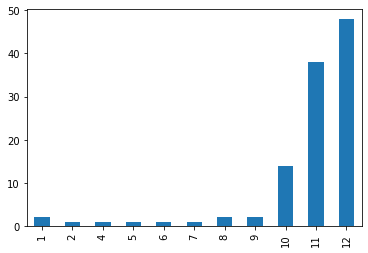

In [20]:
c = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

#### **Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.**

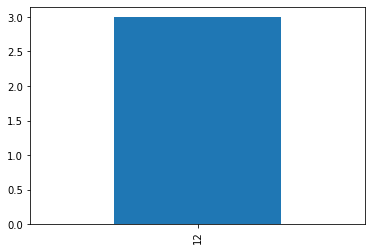

In [21]:
c = release_dates[(release_dates.title.str.startswith('The Hobbit')) & (release_dates.country == 'USA')]
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

#### **Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.**

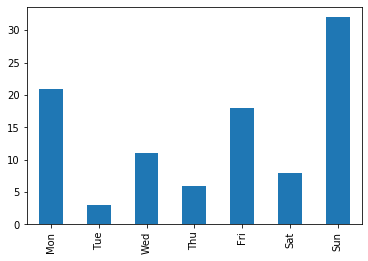

In [73]:
m = release_dates[(release_dates.title.str.contains("Romance")) & (release_dates.country == "USA")]
m.date.dt.dayofweek.value_counts().sort_index().plot('bar')
_=plt.xticks(list(range(7)),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

#### **Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA**

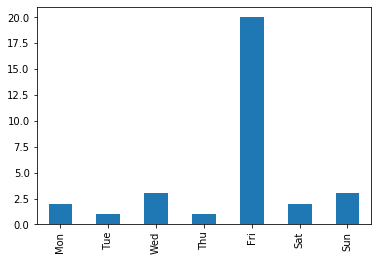

In [74]:
m = release_dates[(release_dates.title.str.contains("Action")) & (release_dates.country == "USA")]
m.date.dt.dayofweek.value_counts().sort_index().plot('bar')
_=plt.xticks(list(range(7)),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

#### **On which date was each Judi Dench movie from the 1990s released in the USA?**

In [49]:
c = cast[(cast.name=='Judi Dench') & ((cast.year // 10)*10 == 1990)][['title','year']]
m = release_dates[(release_dates.title.isin(c.title)) & (release_dates.date.dt.year.isin(c.year)) & (release_dates.country=="USA")]
m.sort_values('date')

,title,year,country,date
131568,GoldenEye,1995,USA,1995-11-17
168103,Jack & Sarah,1995,USA,1996-03-22
138189,Hamlet,1996,USA,1996-12-25
237508,Mrs Brown,1997,USA,1997-10-03
411037,Tomorrow Never Dies,1997,USA,1997-12-19
304523,Shakespeare in Love,1998,USA,1999-01-08
334356,Tea with Mussolini,1999,USA,1999-05-14
404104,The World Is Not Enough,1999,USA,1999-11-19


#### **OR**

In [57]:
c = cast[(cast.name=='Judi Dench') & ((cast.year // 10)*10 == 1990)][['title','year']]
m = release_dates[release_dates.country=="USA"]
r = pd.merge(left=c,right=m,right_on=['title','year'],left_on=['title','year']).sort_values('date')
r

,title,year,country,date
0,GoldenEye,1995,USA,1995-11-17
2,Jack & Sarah,1995,USA,1996-03-22
1,Hamlet,1996,USA,1996-12-25
3,Mrs Brown,1997,USA,1997-10-03
7,Tomorrow Never Dies,1997,USA,1997-12-19
4,Shakespeare in Love,1998,USA,1999-01-08
5,Tea with Mussolini,1999,USA,1999-05-14
6,The World Is Not Enough,1999,USA,1999-11-19


#### **In which months do films with Judi Dench tend to be released in the USA?**

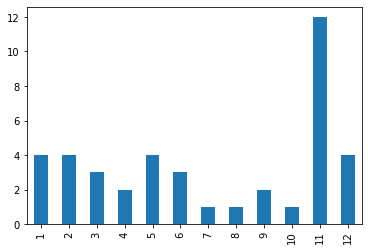

In [65]:
r = release_dates[release_dates.country == "USA"]
c = cast[cast.name == "Judi Dench"]
m = pd.merge(left=c,right=r,how='inner')
m.date.dt.month.value_counts().sort_index().plot('bar')

#### **In which months do films with Tom Cruise tend to be released in the USA?**

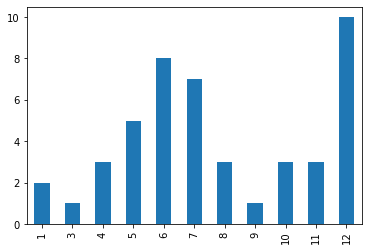

In [72]:
c = cast[cast.name == "Tom Cruise"]
r = release_dates[release_dates.country == "USA"]
pd.merge(c,r).date.dt.month.value_counts().sort_index().plot('bar')